<a href="https://colab.research.google.com/github/sahdahx/comsta/blob/main/Comsta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Memuat dan Memahami Data
Memuat dataset untuk melihat fitur-fitur yang tersedia dan bagaimana korelasinya dengan target Hardness.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Memuat dataset train.csv
train_data = pd.read_csv('train.csv')

# Menampilkan informasi umum tentang dataset
print("Informasi dataset train.csv:")
train_data.info()

# Menampilkan statistik deskriptif dari dataset
print("\nStatistik deskriptif dari dataset train.csv:")
print(train_data.describe())

# Menampilkan beberapa baris pertama dataset
train_data.head()

Informasi dataset train.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      6400 non-null   int64  
 1   Alkalinity, total       6400 non-null   float64
 2   Calcium                 6400 non-null   float64
 3   Chloride                6400 non-null   float64
 4   Fluoride                6400 non-null   float64
 5   Magnesium               6400 non-null   float64
 6   Nitrate as N            6400 non-null   float64
 7   Sodium                  6400 non-null   float64
 8   Specific Conductivity   6400 non-null   float64
 9   Sulfate                 6400 non-null   float64
 10  Total Dissolved Solids  6400 non-null   float64
 11  Hardness                6400 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 600.1 KB

Statistik deskriptif dari dataset train.csv:
                id  Alk

,id,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids,Hardness
0,0,120.0,24.0,6.9,0.314,7.1,0.498,48.0,510.0,23.2,240.0,90.4
1,1,140.0,41.0,11.0,0.150,6.5,0.950,19.0,300.0,8.5,190.0,130.0
2,2,160.0,51.0,9.0,0.450,9.1,2.500,12.0,370.0,25.0,230.0,160.0
3,3,46.0,13.0,2.9,0.120,2.7,0.430,6.4,110.0,5.0,97.0,41.0
4,4,240.0,147.0,70.0,0.600,48.0,6.800,93.0,1410.0,418.0,950.0,586.0


# Pembersihan Data
Memeriksa dan membersihkan data jika diperlukan, seperti mengatasi missing values atau data yang tidak valid.

In [ ]:
# Menampilkan informasi tentang dataset untuk memeriksa missing values
print("Informasi dataset train.csv sebelum pembersihan:")
train_data.info()

# Memeriksa jumlah missing values dalam setiap kolom
missing_values = train_data.isnull().sum()
print("\nJumlah missing values per kolom:")
print(missing_values)

# Menangani missing values (contoh: mengisi dengan nilai rata-rata)
mean_values = train_data.mean()
train_data.fillna(mean_values, inplace=True)

# Memeriksa kembali untuk memastikan tidak ada lagi missing values
missing_values_after = train_data.isnull().sum()
print("\nJumlah missing values setelah handling:")
print(missing_values_after)

Informasi dataset train.csv sebelum pembersihan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      6400 non-null   int64  
 1   Alkalinity, total       6400 non-null   float64
 2   Calcium                 6400 non-null   float64
 3   Chloride                6400 non-null   float64
 4   Fluoride                6400 non-null   float64
 5   Magnesium               6400 non-null   float64
 6   Nitrate as N            6400 non-null   float64
 7   Sodium                  6400 non-null   float64
 8   Specific Conductivity   6400 non-null   float64
 9   Sulfate                 6400 non-null   float64
 10  Total Dissolved Solids  6400 non-null   float64
 11  Hardness                6400 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 600.1 KB

Jumlah missing values per kolom:
id             

# Eksplorasi Data
Melakukan eksplorasi untuk memahami distribusi variabel dan korelasi antara variabel input dengan target.

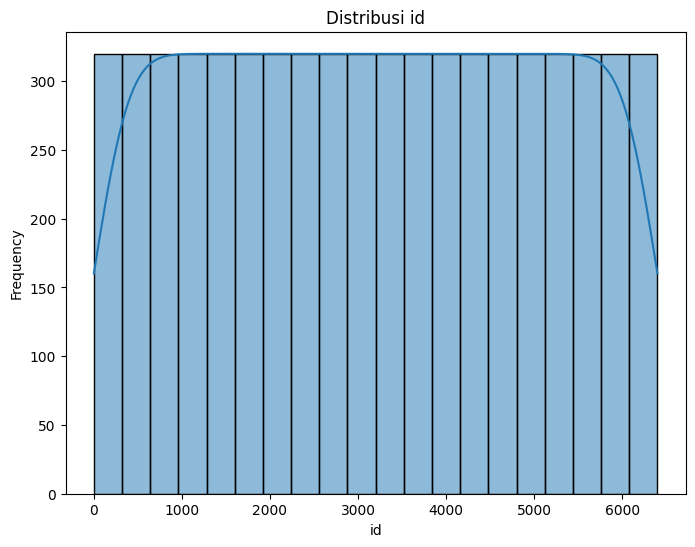

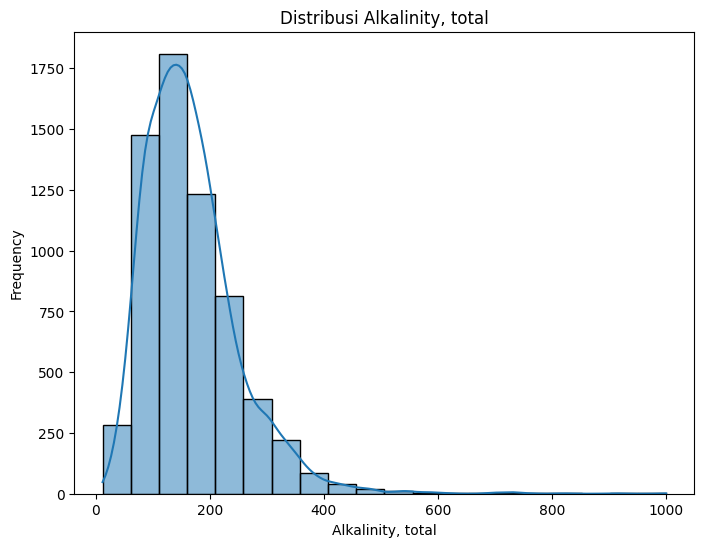

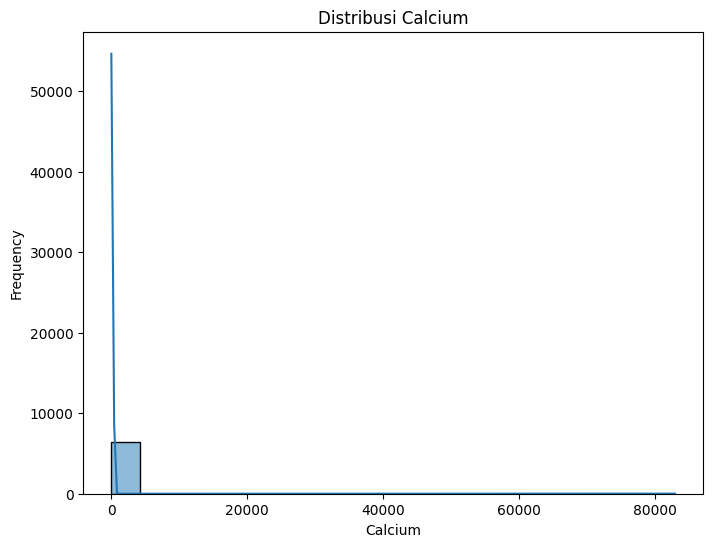

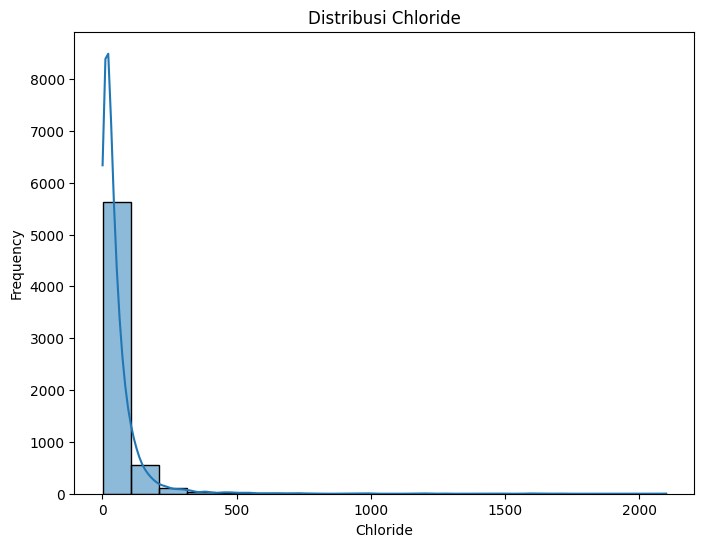

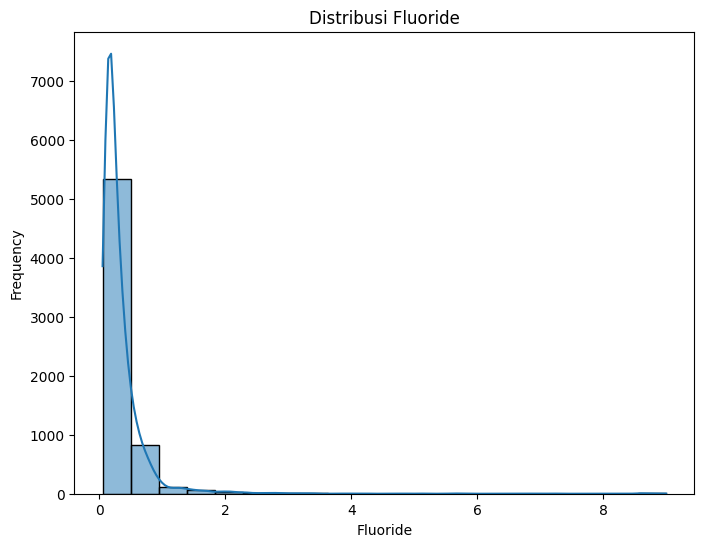

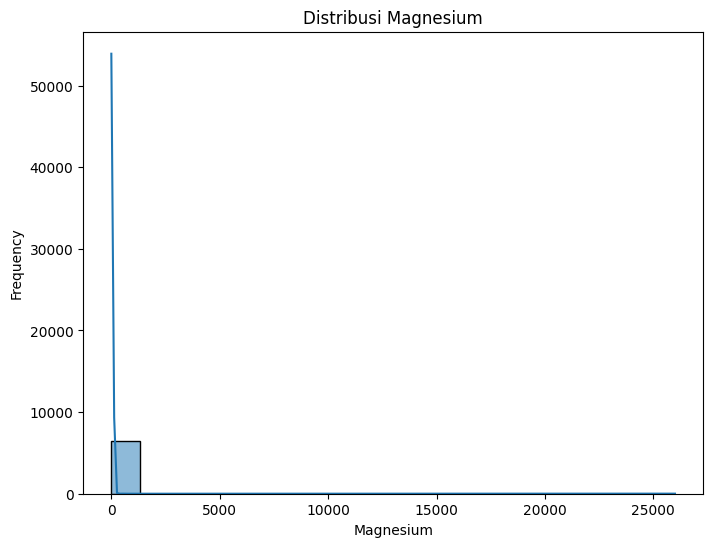

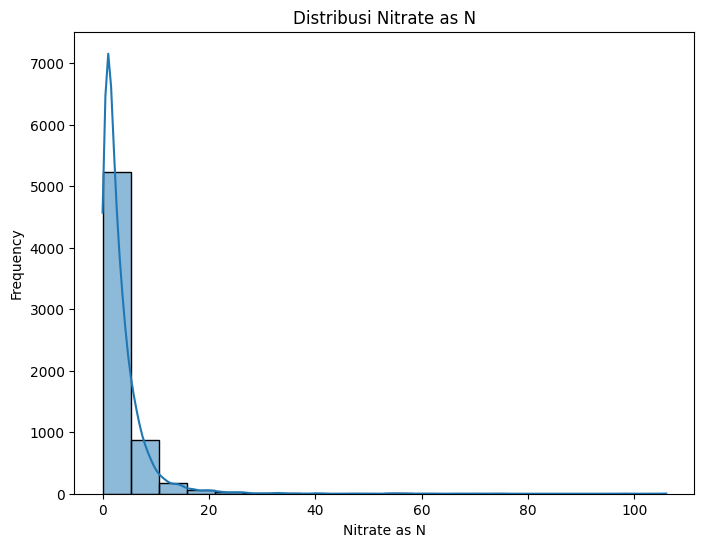

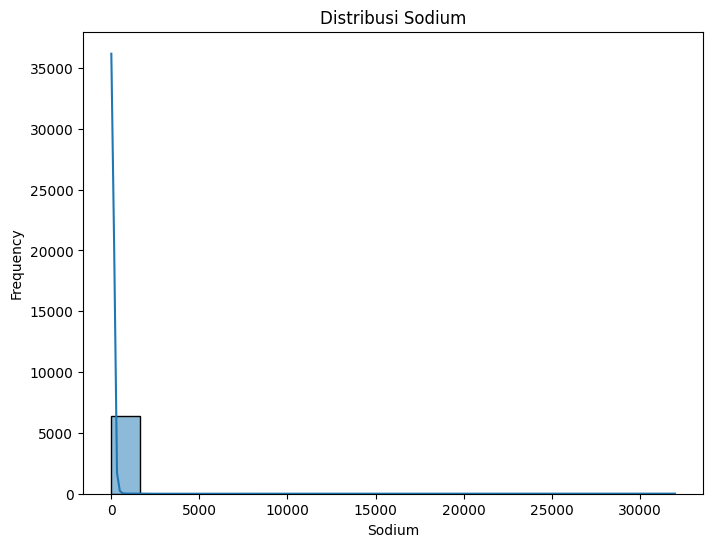

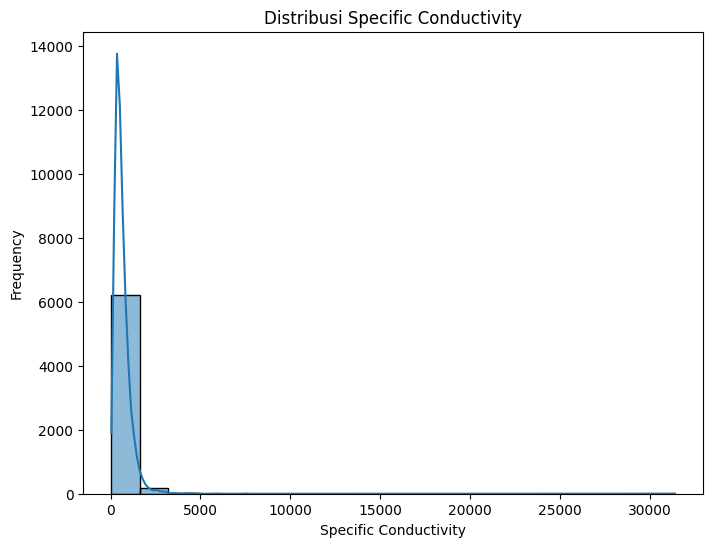

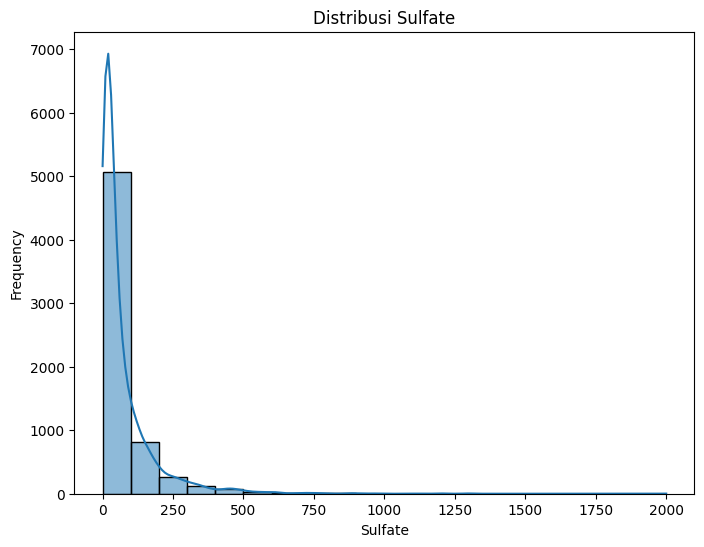

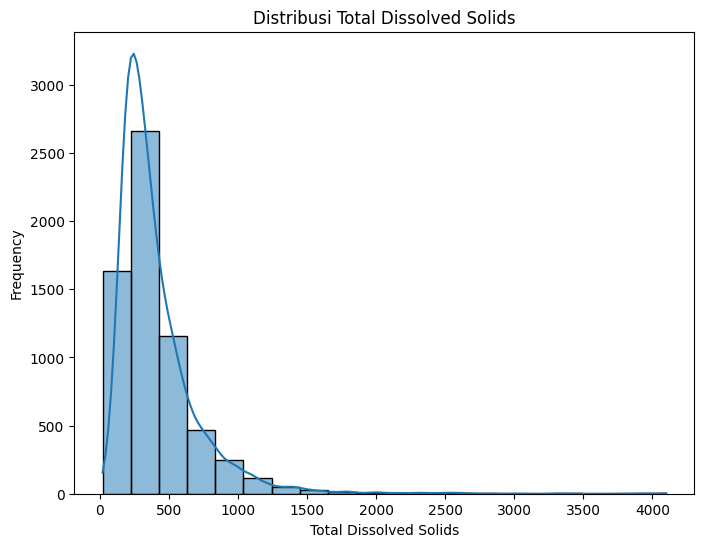

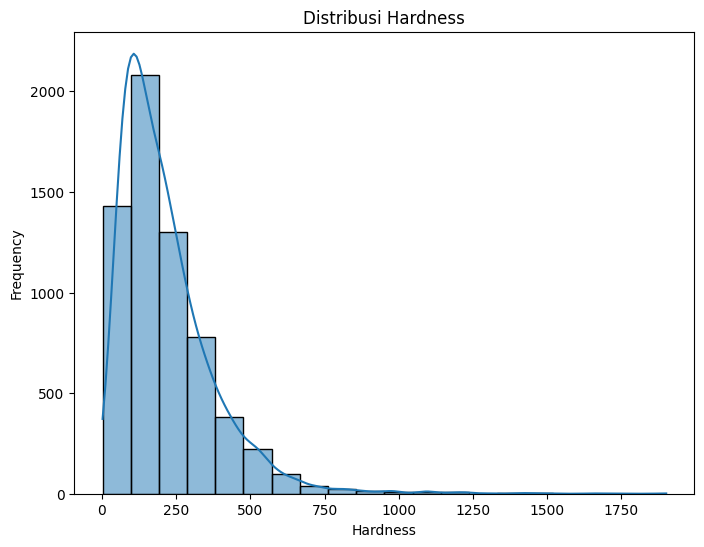

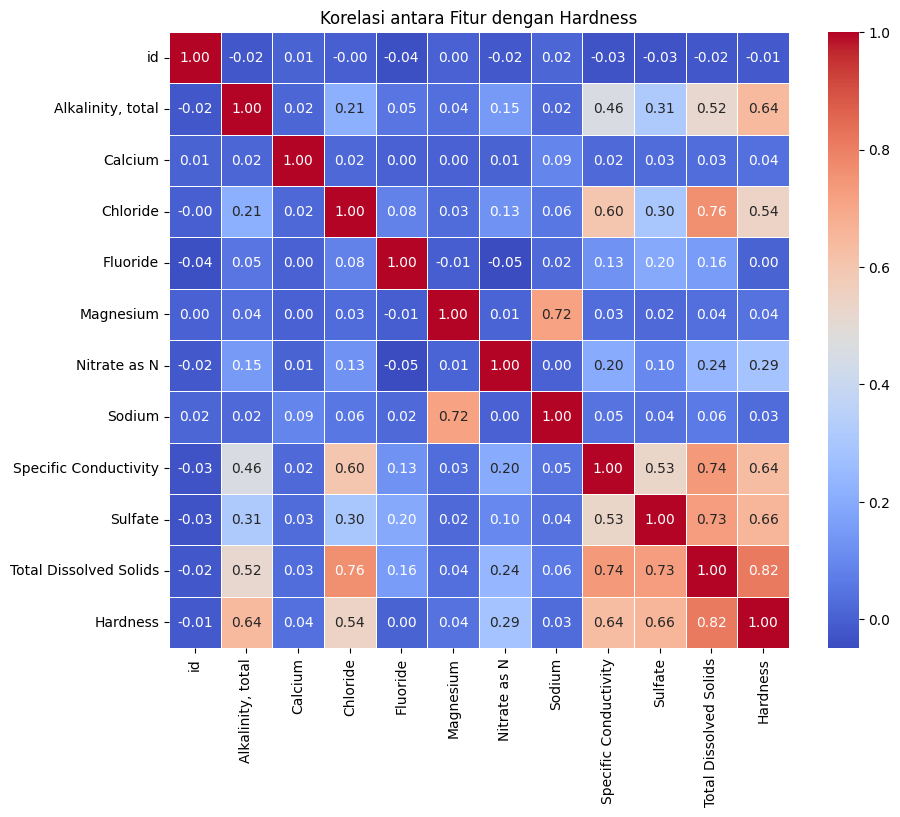

Hardness                  1.000000
Total Dissolved Solids    0.815202
Sulfate                   0.658456
Alkalinity, total         0.639662
Specific Conductivity     0.635271
Chloride                  0.542279
Nitrate as N              0.286936
Magnesium                 0.044469
Calcium                   0.037651
Sodium                    0.025808
Fluoride                  0.004647
id                       -0.014581
Name: Hardness, dtype: float64


In [ ]:
# Melakukan eksplorasi distribusi variabel input
numeric_features = train_data.select_dtypes(include=['float64', 'int64'])

# Menampilkan histogram untuk setiap fitur numerik
for column in numeric_features.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=train_data, x=column, kde=True, bins=20)
    plt.title(f'Distribusi {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Melakukan eksplorasi korelasi antara variabel input dengan target (Hardness)
correlation_matrix = train_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Korelasi antara Fitur dengan Hardness')
plt.show()

# Menghitung korelasi antara fitur-fitur dan target (Hardness)
correlation_matrix = train_data.corr()
hardness_correlation = correlation_matrix['Hardness'].sort_values(ascending=False)
print(hardness_correlation)

# Pemodelan
Membangun model untuk memprediksi nilai `Hardness` menggunakan algoritma machine learning, seperti Regresi Linear, Decision Tree, atau algoritma lain yang cocok untuk masalah ini.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Memisahkan fitur (X) dan target (y)
X = train_data.drop(['id', 'Hardness'], axis=1)
y = train_data['Hardness']

# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membangun model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluasi model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

import pandas as pd

# Memuat dataset train.csv
train_data = pd.read_csv('train.csv')

# Memeriksa dan membersihkan data jika diperlukan
mean_values_train = train_data.mean()
train_data.fillna(mean_values_train, inplace=True)

Mean Squared Error (MSE): 11159609.76
R-squared (R2): -405.04


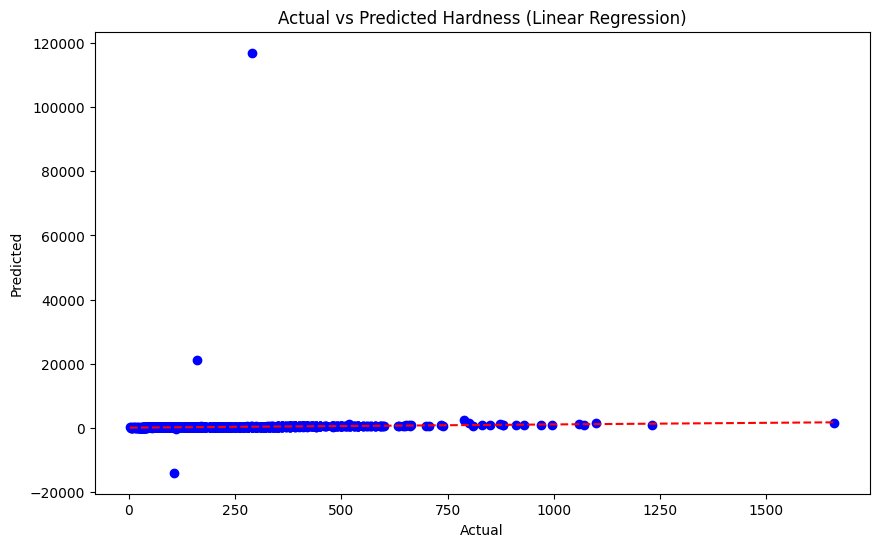

In [ ]:
# Visualisasi hasil prediksi
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Hardness (Linear Regression)')
plt.show()

# Evaluasi Model dan Submission
Menggunakan data test.csv untuk melakukan prediksi dan mengevaluasi performa model menggunakan metrik yang sesuai.

In [ ]:
# Evaluasi model
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

# Prediksi menggunakan model pada dataset test.csv
X_final_test = test_data.drop(['id'], axis=1)
predictions = model.predict(X_final_test)

# Membuat DataFrame untuk hasil prediksi
submission = pd.DataFrame({'id': test_data['id'], 'Hardness': predictions})
print(submission)

# Menyimpan hasil prediksi ke dalam file submission.csv
submission.to_csv('submission.csv', index=False)

Mean Squared Error (MSE): 11159609.76
R-squared (R2): -405.04
        id    Hardness
0     6400   84.193521
1     6401  122.914523
2     6402  123.868032
3     6403   98.496798
4     6404  306.362599
...    ...         ...
1596  7996   85.474442
1597  7997   64.619620
1598  7998  200.536440
1599  7999  252.001820
1600  8000  161.937205

[1601 rows x 2 columns]


In [ ]:
import pandas as pd

# Load dataset train.csv
df = pd.read_csv('train.csv')

# Hitung persentil 75 dari kolom Sodium
sodium_p75 = df['Sodium'].quantile(0.75)

# Hitung rata-rata dari kolom Alkalinity
alkalinity_mean = df['Alkalinity, total'].mean()

# Filter data untuk sumber air yang memenuhi kriteria
filtered_data = df[(df['Sodium'] > sodium_p75) & (df['Alkalinity, total'] > alkalinity_mean)]

# Hitung rata-rata Hardness dari subset data yang memenuhi kondisi
mean_hardness = filtered_data['Hardness'].mean()

print(f"Rata-rata Hardness dari sumber air dengan Sodium di atas persentil 75 dan Alkalinity di atas rata-rata: {mean_hardness:.2f}")

# Hitung Q1 dan Q3 dari kolom Alkalinity
Q1 = df['Alkalinity, total'].quantile(0.25)
Q3 = df['Alkalinity, total'].quantile(0.75)

# Hitung IQR (Interquartile Range)
IQR = Q3 - Q1

# Tentukan batas atas dan bawah untuk menentukan outlier
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Filter data untuk menemukan outlier
outliers = df[(df['Alkalinity, total'] < lower_bound) | (df['Alkalinity, total'] > upper_bound)]

if outliers.empty:
    print("Tidak ada outlier pada tingkat Kebasaan (Alkalinity).")
else:
    print("Data berikut ini di luar batas dan dapat dianggap sebagai outlier pada tingkat Kebasaan (Alkalinity):")
    print(outliers)


Rata-rata Hardness dari sumber air dengan Sodium di atas persentil 75 dan Alkalinity di atas rata-rata: 383.08
Data berikut ini di luar batas dan dapat dianggap sebagai outlier pada tingkat Kebasaan (Alkalinity):
        id  Alkalinity, total  Calcium  Chloride  Fluoride  Magnesium  \
34      34              400.0    31.00     160.0      0.40      43.00   
36      36              360.0    16.00     170.0      1.70      14.00   
39      39              617.0    87.30     179.0      1.20      71.20   
48      48              360.0   153.00     146.0      0.10      90.00   
54      54              370.0    69.89      82.8      0.21      32.51   
...    ...                ...      ...       ...       ...        ...   
6193  6193              410.0   110.00     130.0      0.61      72.00   
6204  6204              390.0    81.00      66.0      0.27      53.00   
6206  6206              390.0    52.00      98.0      0.29      35.00   
6323  6323              461.0   126.00     119.0      0.2